## Introduction
In start this activity by looking at how decision trees tend to overfit the data if they are left unchecked. Over fitting the data means they try to account for the outlying data points at the cost of the prediction accuracy of the general trend.

We will also look at k-fold cross validation. This is a more robust method of validation than the held-out method we used previously.

In k-fold cross validation, we can test every example once. This is done by splitting the data set into k subsets and training/testing the model k times using different combinations of the subsets.

Finally, we look at how accurate our model is on QSOs compared with other galaxies. As mentioned in the lectures, QSOs are galaxies that have an Active Galactic Nucleus (AGN). The AGN makes the galaxy brighter and as such they are detectable with the SDSS instruments out to much higher redshifts.

We will use the same data set as the first activity and even some of functions we wrote in previous questions.

## Overfitting and tree depth
Decision trees have many advantages: they are simple to implement, easy to interpret, the data doesn't require too much preparation, and they are reasonably efficient computationally.

Decision trees do have some limitations though, one of the biggest being they tend to over fit the data. What this means is that if they are left unchecked they will create an overly complicated tree that attempts to account for outliers in the data. This comes at the expense of the accuracy of the general trend.

Part of the reason for this over-fitting is that the algorithm works by trying to optimise the decision locally at each node. There are ways in which this can be mitigated and in the next problem we will see how constraining the number of decision node rows (the tree depth) impacts on the accuracy of our predictions.

## Setting a maximum depth
In order to see how the tree is overfitting we would like to examine how our decision tree performs for different tree depths. Specifically, we would like to see how it performs on test data compared to the data that was used to train it.

Naïvely we'd expect, the deeper the tree, the better it should perform. However, as the model overfits we see a difference in its accuracy on the training data and the more general testing data.

We can control the depth of decision tree learned, using an argument to DecisionTreeRegressor. For example, to set the maximum depth to 5:


dtr = DecisionTreeRegressor(max_depth=5)

## Overfitting Trees
Complete the function accuracy_by_treedepth. The function should return the median difference for both the testing and training data sets for each of the tree depths in depths.

accuracy_by_treedepth should take the following arguments:

 - features and targets (as in previous problems);

 - depths: an array of tree depths to be used as the max_depth of the decision tree regressor.

Your function should return two lists (or arrays) containing the median_diff values for the predictions made on the training and test sets using the maximum tree depths given by the depths.

For example, if depths is [3, 5, 7], then your function should return two lists of length 3. You can choose the size of the split between your testing and training data (if in doubt, 50:50 is fine).

In [2]:
# helper function
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [3]:
#helper function
def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0], 4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features, targets

In [4]:
#helper function
def median_diff(predicted, actual):
  diff =  predicted - actual
  abs_diff = np.abs(diff)
  return np.median(abs_diff)

In [5]:
# helper function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  
  split_index = int(0.5 * len(features))
  train_features = features[:split_index]
  test_features = features[split_index:]
  train_targets = targets[:split_index]
  test_targets = targets[split_index:]
  

  # initialise arrays or lists to store the accuracies for the below loop
  train_acc= []; test_acc = []
  # loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features,train_targets)
    

    # get the predictions for the training set and calculate their median_diff
    predictions_train = dtr.predict(train_features)
    train_med_diff=median_diff(train_targets, predictions_train)
    #print(train_med_diffs)
    # get the predictions for the testing set and calculate their median_diff
    predictions_test = dtr.predict(test_features) 
    test_med_diff=median_diff(test_targets,predictions_test)
    #print(test_med_diffs)
  # return the accuracies for the training and thier median_diff
    train_acc.append(train_med_diff),test_acc.append(test_med_diff)
  return train_acc,test_acc

In [6]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

In [10]:
# Generate several depths to test
tree_depths = [i for i in range(1, 36, 2)]

In [11]:
# Call the function
train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    

Depth with lowest median difference : 21


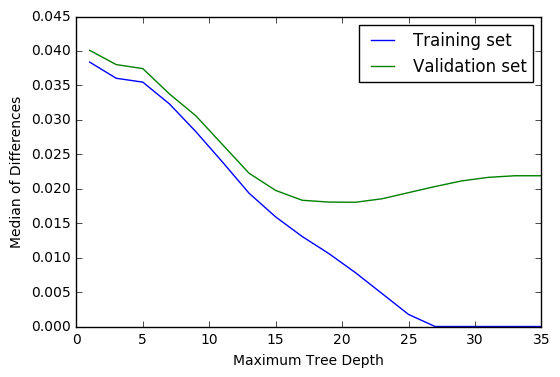

In [12]:
# Plot the results
train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.show()

## Discussion of results
We can see that the accuracy of the decision tree on the training set gets better as we allow the tree to grow to greater depths. In fact, at a depth of 27 our errors goes to zero!

Conversly, the accuracy measure of the predictions for the test set gets better initially and then worse at larger tree depths. At a tree depth ~19 the decision tree starts to overfit the data. This means it tries to take into account outliers in the training set and loses its general predictive accuracy.

Overfitting is a common problem with decision trees and can be circumvented by adjusting parameters like the tree depth or setting a minimum number of cases at each node. For now, we will set a maximum tree depth of 19 to prevent over-fitting in our redshift problem.

## Cross Validation
The method we used to validate our model so far is known as hold-out validation. Hold out validation splits the data in two, one set to test with and the other to train with. Hold out validation is the most basic form of validation.

While hold-out validation is better than no validation, the measured accuracy (i.e. our median of differences) will vary depending on how we split the data into testing and training subsets. The med_diff that we get from one randomly sampled training set will vary to that of a different random training set of the same size.

In order to be more certain of our models accuracy we should use k -fold cross validation. k-fold validation works in a similar way to hold-out except that we split the data into k- subsets. We train and test the model  times, recording the accuracy each time. Each time we use a different combination of k-1 subsets to train the model and the final k-th subset to test. We take the average of the k- accuracy measurements to be the overall accuracy of the the model.

## Cross Validation cont.

## KFold

The KFold library is designed to split the data into training and testing subsets. It does this by offering an iterable object that can be initialised with


kf = KFold(n_splits=k, shuffle=True)
The n_splits=k specifies the number of subsets to use.

By default shuffle is set to false. It is generally good practice to shuffle the data for cross validation as sometimes during collection and storage, data of a similar type can be stored adjacently which would lead to some learning bias when training the tree. For example, if the data was sorted by redshift, on the first iteration the model might be trained with redshifts 0 to 3 and tested on galaxies with redshifts ~4.

In the next couple of problems we will use the sklearn library KFold to help us split our data into our k - 1 training subsets and remaining test subset. In the first problem we will use the convenience of KFolds to help us calculate the k-fold cross validated accuracy of our model. In the second we will extend this to provide a k-folded cross validated prediction for every galaxy in our data set.

## KFold Cross Validation

Your task is to complete the function cross_validate_model. The function takes 4 arguments:

  - model, feaures, and targets as in previous problems;
  - k in our k-fold. This is the number of subsets to train and test.

Your function should return a list containing the k median of differences for each of the k folds using median_diff.

Note that we have set the max_depth=19 when we initialise the decision tree to prevent the model from overfitting.

## KFolds usage

We have created the KFold object to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.

Specifically, the object is initialised with


kf = KFold(n_splits=k, shuffle=True)

The n_splits=k passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:


for train_indices, test_indices in kf.split(features):

The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. features[train_indices],targets[train_indices]

In [15]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [16]:
# helper function
# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  all_predictions = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features,train_targets)
    # predict using the model
    predictions = model.predict(test_features)
   
    
  
    # calculate the median_diff from predicted values and append to results arrays
    
    calculate_median_diff= median_diff(predictions, test_targets)
    all_predictions.append(calculate_median_diff)

 
  # return the list with your median difference values
   
  return all_predictions 

In [17]:
data = np.load('./sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

In [18]:
# initialize model with a maximum depth of 19
dtr = DecisionTreeRegressor(max_depth=19)

In [19]:
# call your cross validation function
diffs = cross_validate_model(dtr, features, targets, 10)

In [20]:

# Print the values
print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
print('Mean difference: {:.3f}'.format(np.mean(diffs)))


Differences: 0.018, 0.017, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.017, 0.017
Mean difference: 0.017


## Cross validation of predictions
Cross validation is an important part of ensuring that our model is returning values that are at least partially accurate. The problem with held-out validation is that the we are only able to get prediction values for the data in our test set.

With k-fold cross validation each galaxy is tested at least once and because of this we are able to get a prediction value for every galaxy. We'll do this in the next question...



## KFold Cross Validated Predictions

Complete the function cross_validate_predictions. This is very similar to the previous question except instead of returning the med_diff accuracy measurements we would like to return a predicted value for each of the galaxies.

The function takes the same 4 arguments as the previous question, i.e. model, feaures, targets and k.

Your function should return a single variable. The returned variable should be a 1-D numpy array of length , where  is the number of galaxies in our data set. You should make sure that you maintain the order of galaxies when giving your predictions, such that the first prediction in your array corresponds to the first galaxy in the features and targets arrays.

In [23]:
#helper function
# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    # fit the model for the current set
    model.fit(train_features,train_targets)
    # predict using the model
    predictions = model.predict(test_features)
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions    

In [24]:
data = np.load('./sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = DecisionTreeRegressor(max_depth=19)

In [25]:
# call your cross validation function
predictions = cross_validate_predictions(dtr, features, targets, 10)


In [26]:
# calculate and print the rmsd as a sanity check
diffs = median_diff(predictions, targets)
print('Median difference: {:.3f}'.format(diffs))

Median difference: 0.017


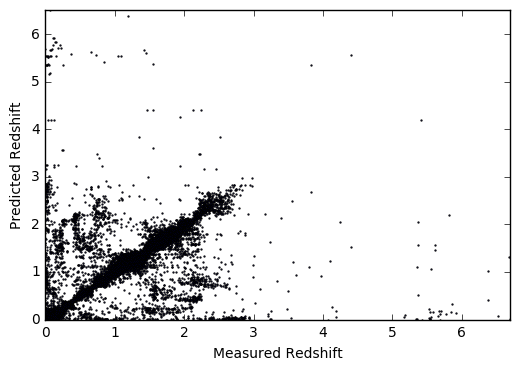

In [27]:
# plot the results to see how well our model looks
plt.scatter(targets, predictions, s=0.4)
plt.xlim((0, targets.max()))
plt.ylim((0, predictions.max()))
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift')
plt.show()

## K-Fold discussion
K-Fold cross validation is an important part of assessing the accuracy of any machine learning model. When we plotted our predicted vs measured redshifts we are able to see that for many our galaxies we were able to get a reasonably accurate prediction of redshift. However, there are also several outliers where our model does not give a good prediction.

<img src='predicted_v_measured.png'>

We have learnt the inner workings of -Fold cross validation with the help of the KFold library. Now that you have a working understanding of -Fold you should be aware that there are several methods and libraries in the sklearn.model_selection modules that provide off the shelf versions of some of the routines that we have just written.

The cross_val_predict function performs the same actions as the cross_validate_predictions function you wrote in the previous question. It can be called with


predictions = cross_val_predict(dtr, features, targets, cv=k)

Where dtr is our decision tree regressor object, cv=k allows us to specify the number of folds(k) to use and features /targets are as we have used them so far.

There is one other tool in the sklearn.model_selection library that is worth noting, the cross_val_score function. This provides a score of how well the model performed similar to the med_diff we have been using so far. We will not go into the usage here, but you need to specify which metric is used to score the model.

## QSOs vs Galaxies
You might be surprised to learn that our sample of galaxies consists of two different populations: regular galaxies and quasi-stellar objects (QSOs). QSOs are a type of galaxy that contain an actively (and intensly) accreting supermassive black hole. This is often referred to as an Active Galactic Nucleus (AGN).

<img src='agn.png'>

The light emitted from the AGN is significantly brighter than the rest of the galaxy and we are able to detect these QSOs out to much higher redshifts. In fact, most of the normal galaxies we have been using to create our models have redshifts less than z0.4, while the QSOs have redshifts all the way out to z6. Due to this contribution from the AGN, the flux magnitudes measured at different wavelengths might not follow the typical profile we assumed when predicting redshifts.

In the next question we are going look at whether there is a difference in the accuracy of the decision trees between QSOs and regular galaxies.


## QSO and Galaxy

Write a function split_galaxies_qsos that splits our data containing both galaxies and QSOs into two arrays that contain only galaxies and QSOs respectively. Your function should take a single data argument.

The function should return two NumPy arrays, the first galaxies containing only rows from data that are galaxies and the second qsos containing only rows that are QSOs.

The data array contains a column data['spec_class'] where the values will either be b'GALAXY' or b'QSO'.

In [28]:
#helper function
# complete this function
def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
  data = np.load('sdss_galaxy_colors.npy')
  galaxies = data[data['spec_class'] == b'GALAXY']
  qso = data[data['spec_class']== b'QSO']
  # return the seperated galaxies and qsos arrays
  return galaxies,qso

In [29]:
#helper function
def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

In [30]:
data = np.load('./sdss_galaxy_colors.npy')

# Split the data set into galaxies and QSOs
galaxies, qsos= split_galaxies_qsos(data)

In [31]:
# Here we cross validate the model and get the cross-validated median difference
# The cross_validated_med_diff function is in "written_functions"
galaxy_med_diff = cross_validate_median_diff(galaxies)
qso_med_diff = cross_validate_median_diff(qsos)


In [32]:
# Print the results
print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
print("Median difference for QSOs: {:.3f}".format(qso_med_diff))

Median difference for Galaxies: 0.016
Median difference for QSOs: 0.075


## QSO Discussion
So our QSOs have a greater median residual (~0.074) than the galaxies (~0.016). There are a couple of possibilities why this is the case.

There are far fewer QSOs (8525) than galaxies (41,475).
Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts  ~0.4. This creates a measurement bias.
When I take a random sample of galaxies the same size as the QSO data set I get a med_diff of ~0.018 which is slightly higher than the full set, but not enough to account for the gap between the two populations.

The figure below shows the normalised distribution function of the two populations.

<img src='redshift_distribution.png'>

We can see that the majority of galaxies form a peak around 0.10 while the QSOs are resonably evenly distributed out to redshift ~2.5 . This can lead to a measurement bias. In the case of the galaxies we have trained our decision tree with target redshifts approximately less than 0.4. As such the predictions from this model will not be larger than the maximum target value. So the maximum difference (or residual) for each galaxy in this set will be a lot smaller than the maximum residual for the QSOs.

We can often get a clearer view of this by looking at the predicted redshifts vs actual redshifts in a plot.

<img src='predicted_actual_qso.png'>

## Summary
We have looked at how decision trees are prone to overfitting the model and how limiting the maximum depth of the tree can be used to prevent this. By comparing the accuracy of the model on the training set with that of the test set for different tree depths we found that a maximum tree depth of 19 was suitable for our model.

We looked at k-fold cross validation and the various methods that can be used to implement it. k-fold cross validation mitigates the risk that the training set has a unique or specific population of the data set; For example if all the training data contained QSOs and the testing set regular galaxies. k-folds cross validation also allows you to get a prediction for all the points in your data set.

We concluded by looking at the sub-population of QSOs and how their accuracy measurement was significantly worse than that of the other galaxies. On closer inspection we found that this was a measurement bias resulting from the difference in the range of redshifts in each population.

You have hopefully learnt all the tools necessary to implement a decision tree on a regression problem of your own. In the next module we will look at how decision trees can be used for classification. We will be using them to classify galaxies as either an elliptical, a spiral or a merger.